<a href="https://colab.research.google.com/github/armony1/Loan_Approval/blob/master/LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test_lAUu6dG.csv to test_lAUu6dG.csv
Saving train_ctrUa4K.csv to train_ctrUa4K.csv


In [0]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [0]:
train_df = pd.read_csv(io.BytesIO(uploaded['train_ctrUa4K.csv']))
test_df = pd.read_csv(io.BytesIO(uploaded['test_lAUu6dG.csv']))

In [0]:
test_LoanID = test_df["Loan_ID"]

In [0]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* Loan ID: Unique Loan ID

* Gender: Male /Female

* Married: Applicant Married or Not(Y/N)

* Dependents: Number of Dependents

* Education: Applicant Education(Grad or Under Grad)
* Self Employed: Self Employed or not (Y/N)
* Applicant Income: Applicant Income
* Coapplicant Income: Coapplicant Income
* Loan Amount: Loan Amount in Thousands
* Loan Amount Term: Term of loan in Months
* Credit History: Credit history meets guidelines
* Property Area: Urban / Semi Urban / Rural
* Loan Status: Loan approved or not (Y/N)


In [0]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
train_df=train_df.drop("Loan_ID",axis=1)
#Unique Loan ID wont help our model improve so i just deleted it.

In [0]:
train_df["Loan_Status"] = [1 if each == "Y" else 0 for each in train_df["Loan_Status"]] 

In [0]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [0]:
train_df=train_df.drop_duplicates()

In [0]:
# I checked for if there is any constant columns, if so they wont help our modeling so we need to drop them.
feats_counts = train_df.nunique(dropna = False)
feats_counts.sort_values()
constant_features = feats_counts.loc[feats_counts == 1].index.tolist()

print(constant_features)

train_df.drop(constant_features, axis=1, inplace = True)

In [0]:
""" 
Kategorik ve nümerik featureları seçtik, buradaki ince ayrıntı sadece tipi "object" olan featureları kategorik olarak seçmemiz,
tipi float olupta yine 3 veya 4 tane unique değer olan featurelarımız olabilir. Bunun içinde nunique fonksiyonunu kullanabiliriz.
eğer (missing value olmadığını varsayarak) 4 tane unique değer varsa bunu da categorical featurelara dahil edebiliriz ve
görselleştirmelerimizi bunlara göre yapabiliriz.
"""
#feats_counts = train_df.nunique(dropna = False)
#print(feats_counts.sort_values())
#print(train_df.dtypes)
#cat_cols = list(train_df.select_dtypes(include=["object"]).columns)
#num_cols = list(train_df.select_dtypes(exclude=["object"]).columns)
#print(cat_cols)
#print(num_cols)

* Male / Female ratio is quite high, most of the applicants are males.
* Most of them have no dependents.
* Most of the applicants are grads.
* Many of them are not self employed.
* And most of the applicants credit history is good.
* Property areas are evenly distributed

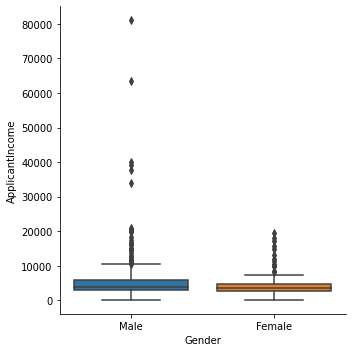

In [218]:
sns.catplot(x = "Gender", y = "ApplicantIncome" ,data=train_df,kind="box")

* We can see that most of the outliers are in ApplicantIncome feature, so i want to clear it from outliers.

In [0]:
limit = train_df["ApplicantIncome"].quantile(0.97)
trimmed_df = train_df[train_df["ApplicantIncome"] < limit]

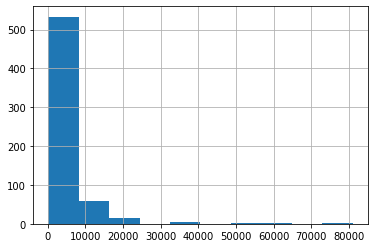

In [0]:
train_df["ApplicantIncome"].hist()

* And i want to do same thing with CoapplicantIncome, this way we get rid of most of the disturbing outliers and our distribution is now better.

In [0]:
limit =trimmed_df["CoapplicantIncome"].quantile(0.97)
trimmed3_df = trimmed_df[trimmed_df["CoapplicantIncome"] < limit]

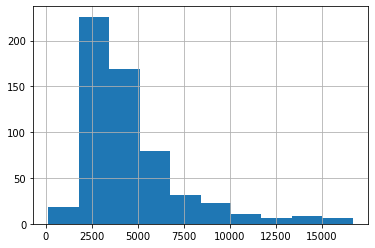

In [0]:
trimmed3_df["ApplicantIncome"].hist()

In [0]:
trimmed3_df_len = len(trimmed3_df)
data = pd.concat([trimmed3_df,test_df],axis=0).reset_index(drop=True)

In [0]:
data=data.drop("Loan_ID",axis=1)

In [0]:
def ctgplt(variable,to):
    
    var = data[variable]
    values=var.value_counts()
    
    f, ax = plt.subplots(figsize = (8,8))
    sns.barplot(x = variable, y = to, data = data)
    plt.show()
    
    print("{}:\n{}".format(variable,values))

# Function for visualization of categorical variables.

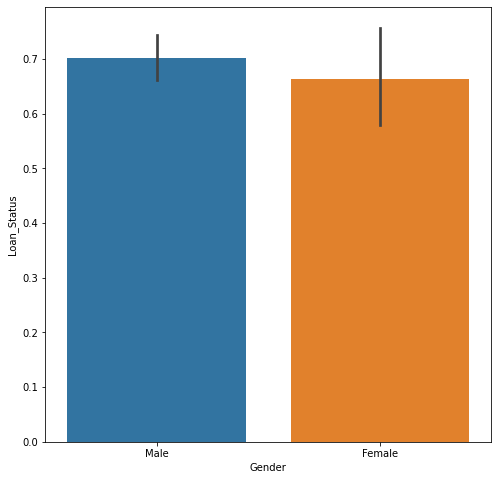

Gender:
Male      746
Female    177
Name: Gender, dtype: int64


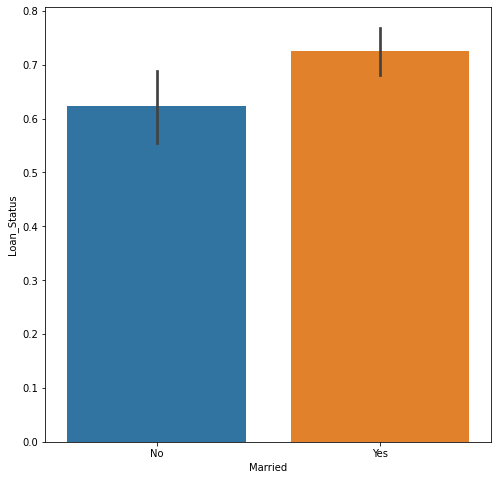

Married:
Yes    605
No     336
Name: Married, dtype: int64


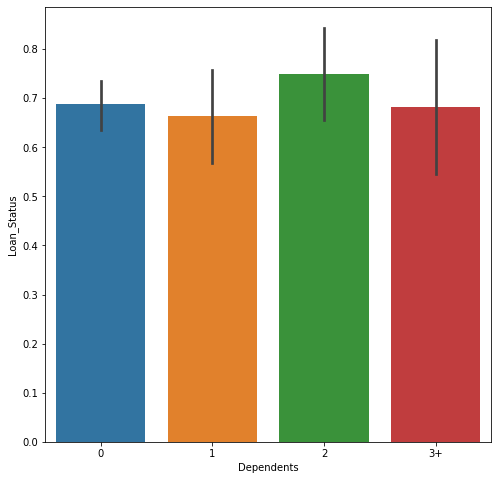

Dependents:
0     527
2     155
1     153
3+     84
Name: Dependents, dtype: int64


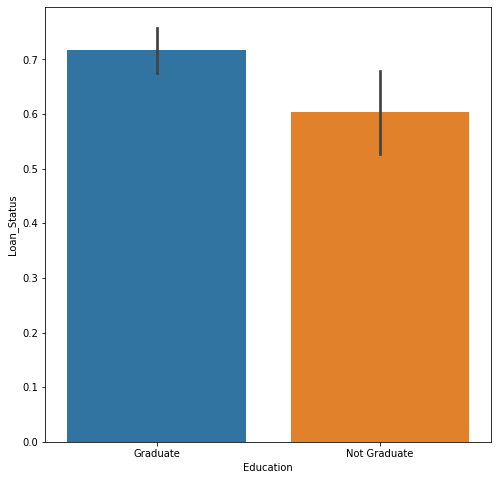

Education:
Graduate        729
Not Graduate    215
Name: Education, dtype: int64


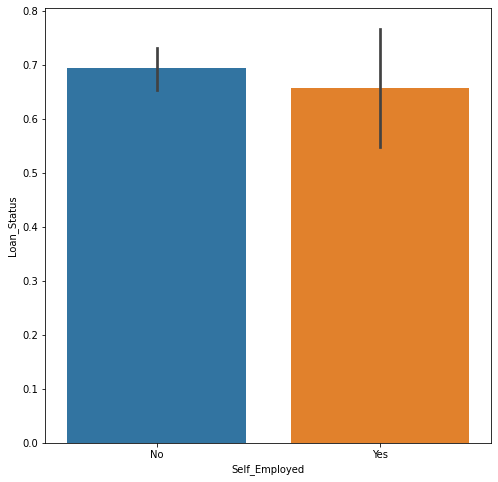

Self_Employed:
No     781
Yes    110
Name: Self_Employed, dtype: int64


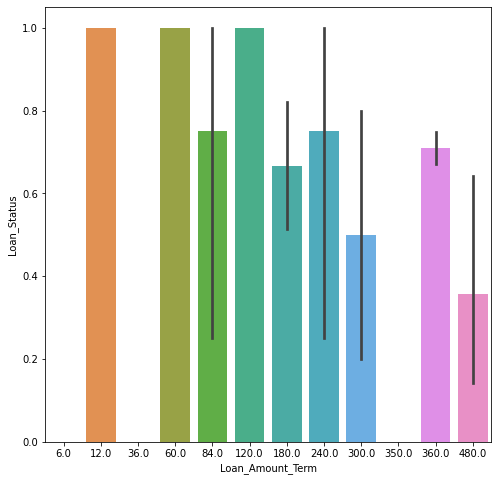

Loan_Amount_Term:
360.0    796
180.0     61
480.0     22
300.0     17
240.0      8
84.0       7
120.0      4
36.0       3
12.0       2
60.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64


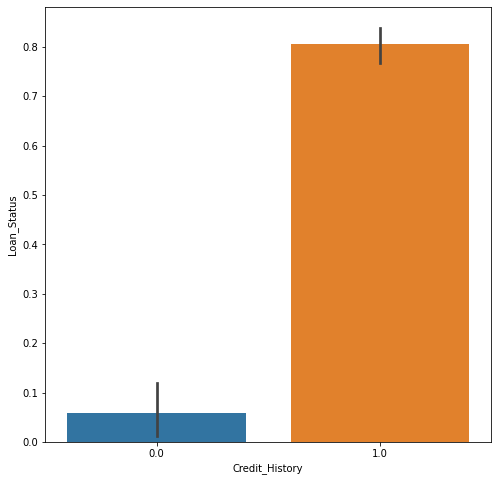

Credit_History:
1.0    726
0.0    143
Name: Credit_History, dtype: int64


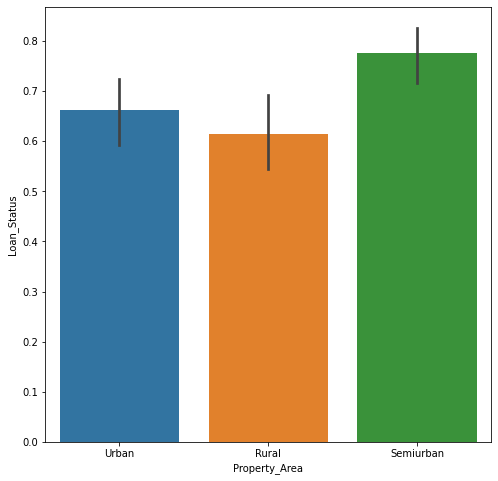

Property_Area:
Semiurban    335
Urban        329
Rural        280
Name: Property_Area, dtype: int64


In [227]:
cat1 = ["Gender","Married","Dependents","Education","Self_Employed","Loan_Amount_Term","Credit_History","Property_Area"]

for each in cat1:
    ctgplt(each,"Loan_Status")

In [0]:
def numplt(data,variable,to):
  c = sns.FacetGrid(data,col=to,height=6)
  c.map(sns.distplot,variable,bins=25)
  plt.show()
#Function for visualization of numeric columns.
#But before i invoke this function i want to clear outliers.

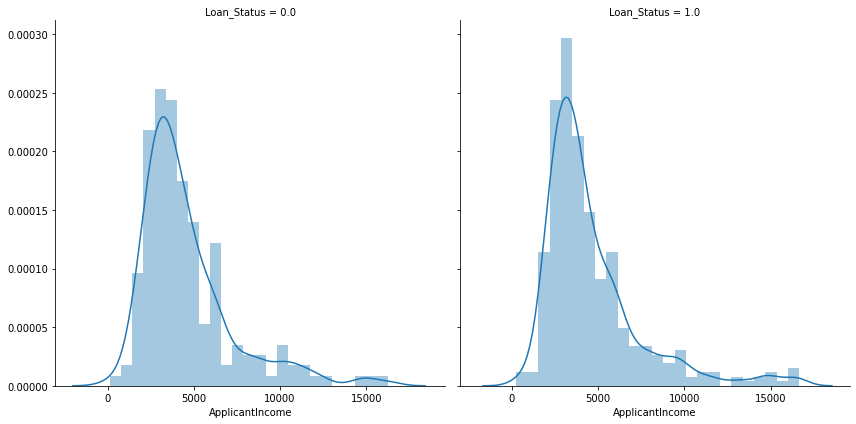

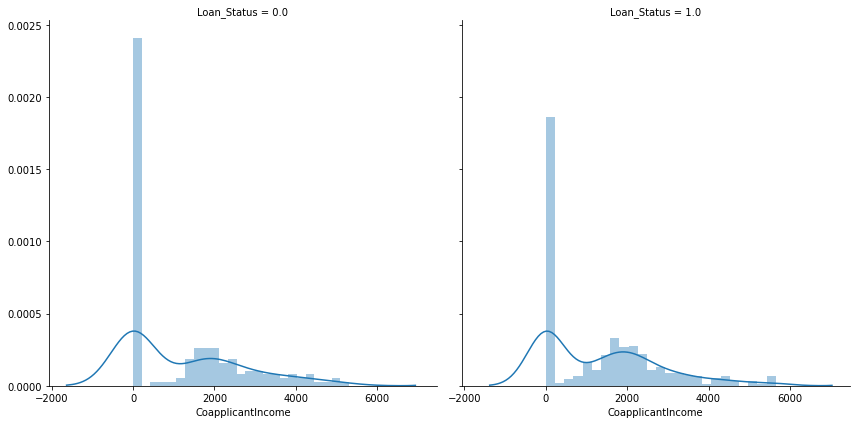

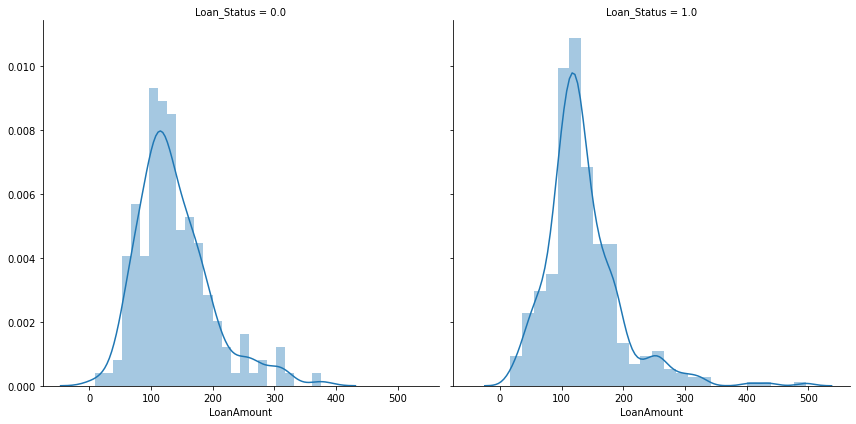

In [229]:
num1 = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]
for each in num1:
  numplt(data,each,"Loan_Status")

In [0]:
def boxplt(variable):
  sns.boxplot(x = data[variable])
  plt.show()

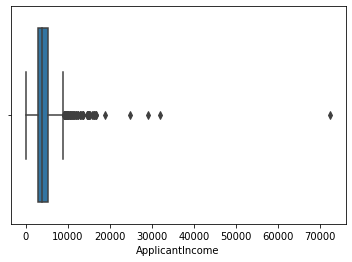

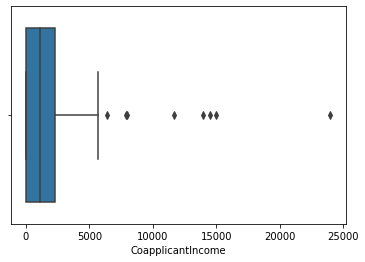

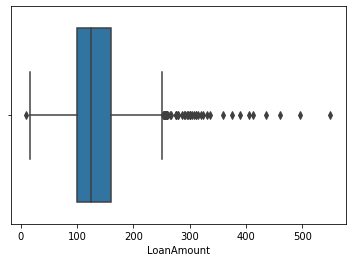

In [231]:
for each in num1:
  boxplt(each)

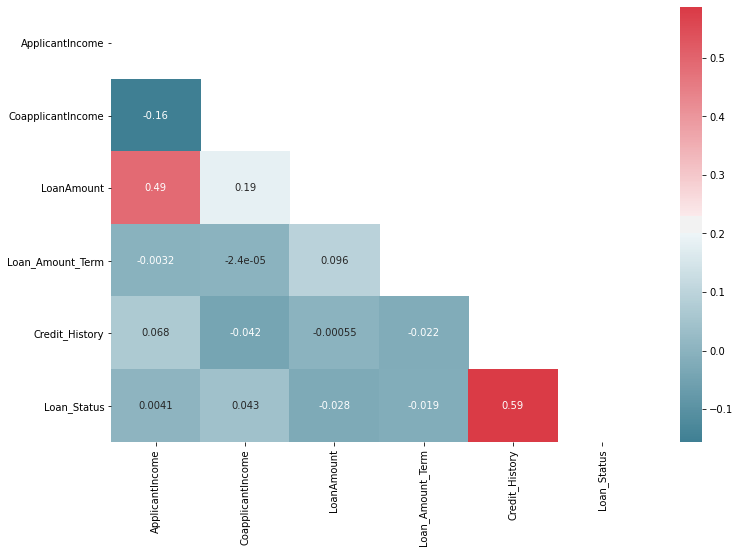

In [220]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax)
plt.show()

In [265]:
data.isnull().sum()

Gender                21
Married                3
Dependents            25
Education              0
Self_Employed         53
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            26
Loan_Amount_Term      20
Credit_History        75
Property_Area          0
Loan_Status          367
dtype: int64

In [264]:
data[data["Married"].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
101,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1.0
215,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1.0
411,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,1.0


* Buradan gördüğümüz gibi coapplicantincome'ı 0 olan 2 olmayan 1 kişi var, buradan yola çıkarak 0 olanlara evli değil, diğer kişiye evli diyebiliriz.

In [0]:
data["Married"].iloc[[215,411]] = data["Married"].iloc[[215,411]].fillna("No")

In [0]:
data["Married"].iloc[[101]] = data["Married"].iloc[[101]].fillna("Yes")

In [268]:
data["Married"].isnull().sum()

0

In [269]:
data[data["Dependents"].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
99,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,1.0
101,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1.0
117,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1.0
213,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,0.0
215,Male,No,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1.0
277,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,0.0
285,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,1.0
315,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,1.0
317,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,1.0
328,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0.0


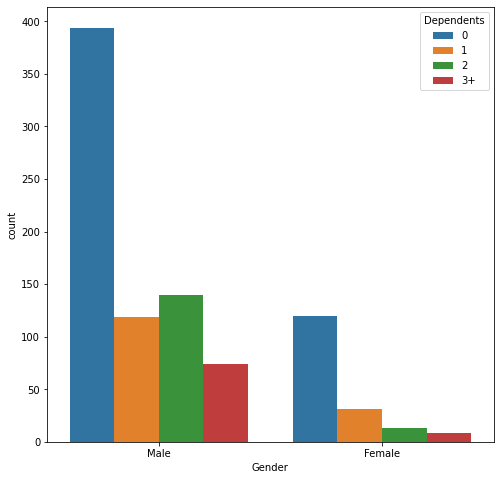

0     394
2     140
1     119
3+     74
Name: Dependents, dtype: int64

In [0]:
f, ax = plt.subplots(figsize = (8,8))
sns.countplot(x ="Gender", hue="Dependents", data = data, ax = ax)
plt.show()
data[data["Gender"] == "Male"]["Dependents"].value_counts()

In [0]:
idx = data[data['Dependents'].isnull()].index

In [0]:
data["Dependents"].iloc[[215,277,315,336,411,561,647,715,842,879,889]]  = data["Dependents"].iloc[[215,277,315,336,411,561,647,715,842,879,889]].fillna("0")

In [272]:
data[data["Dependents"].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
99,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,1.0
101,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1.0
117,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1.0
213,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,0.0
285,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,1.0
317,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,1.0
328,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0.0
486,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,0.0
536,Male,Yes,NaN,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,0.0
623,Male,Yes,NaN,Not Graduate,No,4163,1475.0,162.0,360.0,1.0,Urban,NaN


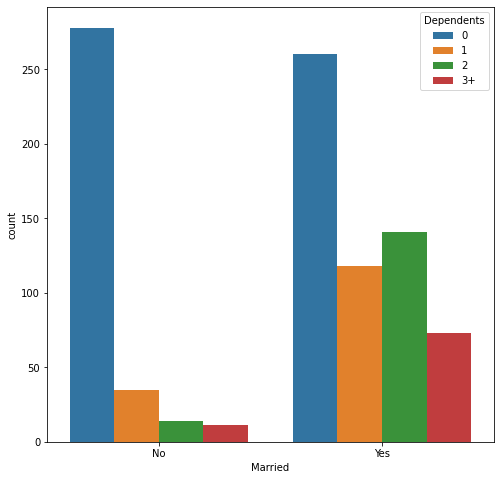

0     260
2     141
1     118
3+     73
Name: Dependents, dtype: int64

In [273]:
f, ax = plt.subplots(figsize = (8,8))
sns.countplot(x ="Married", hue="Dependents", data = data, ax = ax)
plt.show()
data[data["Married"] == "Yes"]["Dependents"].value_counts()

In [0]:
s = data["Dependents"].value_counts(normalize = True)
missing = data["Dependents"].isnull()
data.loc[missing,"Dependents"] = np.random.choice(s.index, size = len(data[missing]), p = s.values)

In [275]:
data[data["Dependents"].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [277]:
data[data['Gender'].isnull()].sort_values(by = "ApplicantIncome",ascending = False)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
856,NaN,No,0,Graduate,No,29167,0.0,185.0,360.0,1.0,Semiurban,NaN
316,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1.0
556,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,1.0
873,NaN,No,0,Graduate,No,6478,0.0,108.0,360.0,1.0,Semiurban,NaN
895,NaN,No,0,Not Graduate,No,4768,0.0,125.0,360.0,1.0,Rural,NaN
552,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,1.0
599,NaN,No,0,Graduate,No,3909,0.0,101.0,360.0,1.0,Urban,NaN
477,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,0.0
628,NaN,Yes,3+,Not Graduate,No,3500,833.0,120.0,360.0,1.0,Semiurban,NaN
21,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,0.0


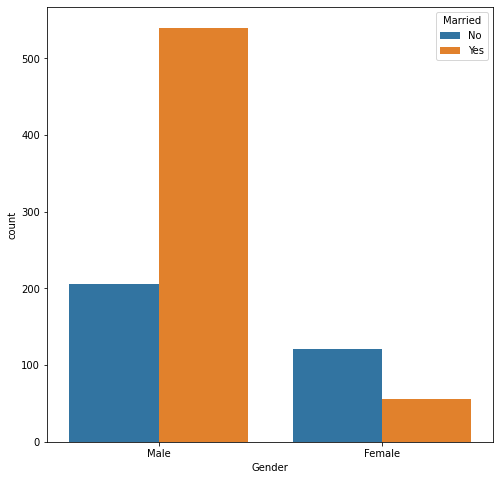

Yes    540
No     206
Name: Married, dtype: int64

 No     121
Yes     56
Name: Married, dtype: int64


In [0]:
f, ax = plt.subplots(figsize = (8,8))
sns.countplot(x ="Gender", hue="Married", data = data, ax = ax)
plt.show()
print(data[data["Gender"] == "Male"]["Married"].value_counts())
print("\n",data[data["Gender"] == "Female"]["Married"].value_counts())

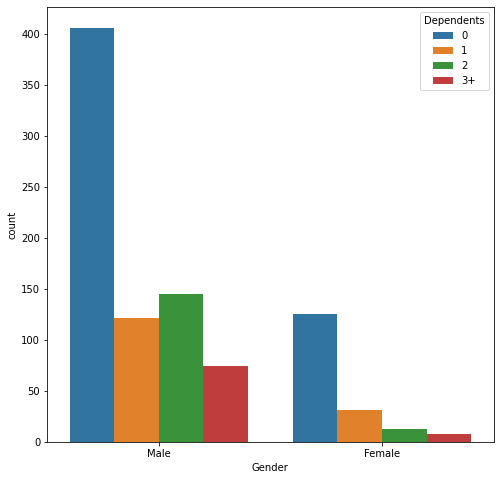

0     406
2     145
1     121
3+     74
Name: Dependents, dtype: int64

 0     125
1      31
2      13
3+      8
Name: Dependents, dtype: int64


In [0]:
f, ax = plt.subplots(figsize = (8,8))
sns.countplot(x ="Gender", hue="Dependents", data = data, ax = ax)
plt.show()
print(data[data["Gender"] == "Male"]["Dependents"].value_counts())
print("\n",data[data["Gender"] == "Female"]["Dependents"].value_counts())

In [278]:
data.groupby("Gender")["CoapplicantIncome"].mean()

Gender
Female     878.457627
Male      1525.428847
Name: CoapplicantIncome, dtype: float64

* Females mostly not married, so this causes their coapplicantincome means to get low. 

In [0]:
s = data["Gender"].value_counts(normalize = True)
missing = data["Gender"].isnull()
data.loc[missing,"Gender"] = np.random.choice(s.index, size = len(data[missing]), p = s.values)

In [280]:
data["Gender"].isnull().sum()

0

In [281]:
data["Loan_Amount_Term"].value_counts()

360.0    796
180.0     61
480.0     22
300.0     17
240.0      8
84.0       7
120.0      4
36.0       3
12.0       2
60.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [0]:
data["Loan_Amount_Term"] = data['Loan_Amount_Term'].fillna(360)

In [0]:
s = data["Self_Employed"].value_counts(normalize = True)
missing = data["Self_Employed"].isnull()
data.loc[missing,"Self_Employed"] = np.random.choice(s.index, size = len(data[missing]), p = s.values)

In [0]:
data['Credit_History'].value_counts()

1.0    726
0.0    143
Name: Credit_History, dtype: int64

In [0]:
s = data["Credit_History"].value_counts(normalize = True)
missing = data["Credit_History"].isnull()
data.loc[missing,"Credit_History"] = np.random.choice(s.index, size = len(data[missing]), p = s.values)

In [0]:
data['Credit_History'].value_counts()

1.0    787
0.0    157
Name: Credit_History, dtype: int64

In [288]:
data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            26
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [0]:
data["LoanAmount"] = data["LoanAmount"].fillna(125)

In [290]:
data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [0]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,125.0,360.0,1.0,Urban,1.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0


In [291]:
data["Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,5849,0.0,125.0,360.0,1.0,Urban,1.0,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0,6000.0


In [292]:
# Feature oluşturma kısmında kullanılacak kod. eklenecek yeni bir kaç feature ve
# dependents feature'ını nümeriğe dönüştürme kısmı yer alıyor. 
#ayrıca 3+ kısmını direkt 3'e eşitledim nümeriğe dönüştürmek için

#data["Income"] = data["ApplicantIncome"] + data['CoapplicantIncome']
idx = data.index[data["Dependents"] == "3+"]

for each in idx:
  data['Dependents'].iloc[each] = "3"

data["Dependents"] = data["Dependents"].astype("int64")
print(data.dtypes)

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status          float64
Income               float64
dtype: object


In [0]:
#data["IncomePerson"] = data["Income"] / (data["Dependents"] + (2 if data["Married"] == "Yes" else 1)) 

In [0]:
data["IncomePerson"] = 0

In [295]:
for each in data.index:
  data["IncomePerson"].iloc[each] = round(data["Income"].iloc[each] / (data["Dependents"].iloc[each] + (2 if data["Married"].iloc[each] == "Yes" else 1)),2)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,IncomePerson
0,Male,No,0,Graduate,No,5849,0.0,125.0,360.0,1.0,Urban,1.0,5849.0,5849.00
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0,6091.0,2030.33
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0,3000.0,1500.00
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0,4941.0,2470.50
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0,6000.0,6000.00


In [296]:
data = data.drop(["Dependents","ApplicantIncome","CoapplicantIncome"],axis=1)
data.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,IncomePerson
0,Male,No,Graduate,No,125.0,360.0,1.0,Urban,1.0,5849.0,5849.00
1,Male,Yes,Graduate,No,128.0,360.0,1.0,Rural,0.0,6091.0,2030.33
2,Male,Yes,Graduate,Yes,66.0,360.0,1.0,Urban,1.0,3000.0,1500.00
3,Male,Yes,Not Graduate,No,120.0,360.0,1.0,Urban,1.0,4941.0,2470.50
4,Male,No,Graduate,No,141.0,360.0,1.0,Urban,1.0,6000.0,6000.00


In [297]:
data = pd.get_dummies(data, columns=["Gender","Married","Education","Self_Employed","Property_Area"], drop_first = True)
data.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Income,IncomePerson,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,125.0,360.0,1.0,1.0,5849.0,5849.00,1,0,0,0,0,1
1,128.0,360.0,1.0,0.0,6091.0,2030.33,1,1,0,0,0,0
2,66.0,360.0,1.0,1.0,3000.0,1500.00,1,1,0,1,0,1
3,120.0,360.0,1.0,1.0,4941.0,2470.50,1,1,1,0,0,1
4,141.0,360.0,1.0,1.0,6000.0,6000.00,1,0,0,0,0,1


In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn import metrics
import xgboost
from xgboost import XGBClassifier 

In [0]:
test = data[trimmed3_df_len:]

In [299]:
test.drop("Loan_Status",axis=1,inplace=True)
test.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Income,IncomePerson,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
577,110.0,360.0,1.0,5720.0,2860.00,1,1,0,0,0,1
578,126.0,360.0,1.0,4576.0,1525.33,1,1,0,0,0,1
579,208.0,360.0,1.0,6800.0,1700.00,1,1,0,0,0,1
580,100.0,360.0,1.0,4886.0,1221.50,1,1,0,0,0,1
581,78.0,360.0,1.0,3276.0,3276.00,1,0,1,0,0,1


In [0]:
train = data[:trimmed3_df_len]
trainX = train.drop("Loan_Status",axis=1)
trainY = train["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size = 0.3, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 403
X_test 174
y_train 403
y_test 174
test 367


In [0]:
logreg = LogisticRegression()
dtree = DecisionTreeClassifier(max_depth=4)

logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)

acc_logreg_train = round(logreg.score(X_train, y_train)*100,2) 
acc_logreg_test = round(logreg.score(X_test,y_test)*100,2)

acc_dtree_train = round(dtree.score(X_train, y_train)*100,2) 
acc_dtree_test = round(dtree.score(X_test,y_test)*100,2)

print("Training Accuracy: % {}".format(acc_logreg_train))
print("Testing Accuracy: % {}".format(acc_logreg_test))

print("Training Accuracy: % {}".format(acc_dtree_train))
print("Testing Accuracy: % {}".format(acc_dtree_test))

Training Accuracy: % 81.14
Testing Accuracy: % 79.89
Training Accuracy: % 83.13
Testing Accuracy: % 79.89


In [0]:
classifier = [DecisionTreeClassifier(random_state=42),
              LogisticRegression(random_state=42),
              KNeighborsClassifier(),
              RandomForestClassifier(random_state=42),
              XGBClassifier(random_state=42)]

In [0]:
params_dtree = {"criterion": ["entropy","gini"],
                "max_depth": np.arange(1,11,1),
                "min_samples_split": np.arange(10,200,10),
                "min_samples_leaf": np.arange(1,11,2)}

params_logreg = {"C": np.linspace(-4,4,20),
                 "solver": ["lbfgs","liblinear"]}

params_knn = {"n_neighbors": np.arange(1,21,1),
              "metric":["minkowski","euclidean","manhattan"],
              "weights":["uniform","distance"]}

params_rtree = {"max_features": np.arange(1,17,4),
                "n_estimators": np.arange(100,601,100),
                "min_samples_leaf": np.arange(1,7,2),
                "min_samples_split":np.arange(1,7,2),}

params_xgb = {"learning_rate":[0.01,0.1,1],
              "n_estimators":[50,100,150],
              "max_depth":[3,5,7],
              "gamma":[1,2,3,4]}

classifier_params = [params_dtree,
                     params_logreg,
                     params_knn,
                     params_rtree,
                     params_xgb]

In [0]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
  clf = GridSearchCV(estimator=classifier[i], param_grid= classifier_params[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
  clf.fit(X_train,y_train)
  cv_result.append(clf.best_score_)
  best_estimators.append(clf.best_estimator_)
  print(cv_result[i])

Fitting 10 folds for each of 1900 candidates, totalling 19000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 13384 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 19000 out of 19000 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8090243902439024
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8090243902439024
Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.7146341463414633
Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 490 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1290 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1840 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 2490 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 3240 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 21.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8065243902439025
Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   28.9s


0.8065243902439025


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   41.5s finished


In [0]:
cv_results = pd.DataFrame({"ML Models":["Decision Tree",
                                        "Logistic Regression",
                                        "K Neighbors Classifier",
                                        "Random Forest",
                                        "XGBClassifier"],
                           "Cross Validation Means": cv_result})
print(cv_results)

                ML Models  Cross Validation Means
0           Decision Tree                0.809024
1     Logistic Regression                0.809024
2  K Neighbors Classifier                0.714634
3           Random Forest                0.806524
4           XGBClassifier                0.806524


In [0]:
best_estimators[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=10,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best')
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7988505747126436
Test F1 Score:  0.8627450980392156
Confusion Matrix on Test Data


Predicted,0.0,1.0,All
True,,,
0.0,29,32,61
1.0,3,110,113
All,32,142,174


In [300]:
best_estimators[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [301]:
dtreeC = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
dtreeC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
test_loan = pd.Series(XGBC.predict(test), name = "Loan_Status").astype(int)
test_loan = test_loan.replace(1, "Y")
test_loan = test_loan.replace(0, "N")
results = pd.concat([test_LoanID,test_loan],axis=1)
results.to_csv("loanapproval.csv",index=False)

In [0]:
files.download("loanapproval.csv")